# Convolutions

In [1]:
# Load neccessary python modules
from skimage import io, color, filter,transform # skimage is an image processing library
import matplotlib.pyplot as plt # matplotlib provides plot functions similar to MATLAB
import numpy as np # numpy provides efficient matrix implementation in python
from scipy import signal # scipy provides scientific computing functions
from IPython.html.widgets.interaction import interact 
# interact function can create an interactive interface to allow user to manipulate parameters and see the result, 
# similar to "Manipulate" in Mathematica

%matplotlib inline 
# configuration of matplotlib



$r(x,y)=\int l(x',y') k(x-x',y-y')dx'dy' = l*r$

## Prepare data
Create a disk image and load a natural image for the visualization of convolution

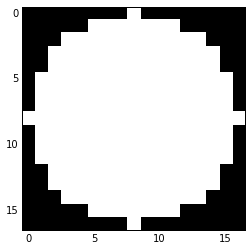

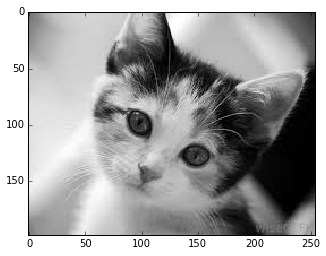

In [5]:
# Make a disk image, testdisk can be used to visualize the effect of the various spatial filters on the convolution output
imageSize = 17;
r = (imageSize-1)/2; cx = cy = imageSize/2; 
[X, Y] = np.meshgrid(np.arange(imageSize), np.arange(imageSize))
diskImg = (X-cx)**2 + (Y-cy)**2 <= r**2

# Load a natural image
im = io.imread('../data/convolution/cat.png');
grayIm = color.rgb2grey(im)



# Show disk image and natural image
plt.figure(); io.imshow(diskImg)
plt.figure(); io.imshow(grayIm)

##Blur an image with a simple square kernel, Blur the disk image

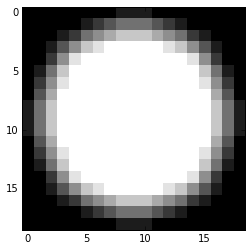

In [6]:
# define a square kernel
f = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])
# Blur the disk image
filteredIm = signal.convolve2d(diskImg, f)
io.imshow(filteredIm)

##Make a square kernel of size 2*r+1, and use it to blur the natural image

<function __main__.AdjustKernelRadius>

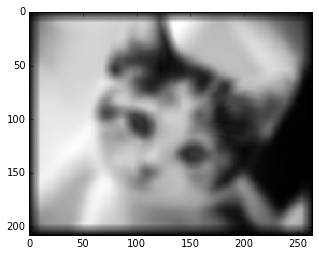

In [7]:

def SquareKernel(r):
    w = 2*r + 1
    return np.ones((w,w)) / (w**2)

im = grayIm
def AdjustKernelRadius(r):
    fim = signal.convolve2d(im, SquareKernel(r))
    io.imshow(fim)
interact(AdjustKernelRadius, r=(1,10))


##Emphasize locations of intensity change by using a 3x3 kernel to approximate a second-order derivative

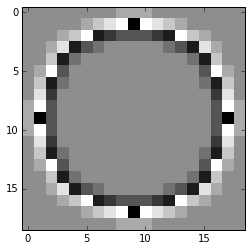

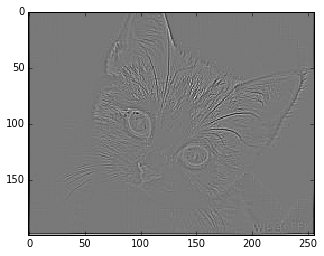

In [8]:
filter1 = np.array([[1,1,1], [1,-8,1], [1,1,1]])
plt.figure(); io.imshow(signal.convolve2d(diskImg, filter1))
plt.figure(); io.imshow(signal.convolve2d(grayIm, filter1))

##Emphasize locations of intensity change in the horizontal direction

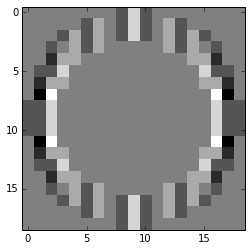

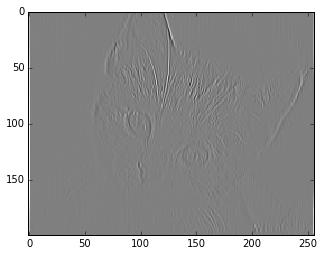

In [9]:
fVertical = np.array([[-1,-1,-1], [2,2,2], [-1,-1,-1]])
fHorizontal = np.array([[-1,2,-1], [-1,2,-1], [-1,2,-1]])
f = fHorizontal
plt.figure(); io.imshow(signal.convolve2d(diskImg, f))
plt.figure(); io.imshow(signal.convolve2d(grayIm, f))

#Exercise

Read in and display a quantized picture of Claude Shannon. Devise a simple low-pass (blur) filter to remove the high spatial frequencies. Find the optimal size of the blur kernel by inspection.

In [11]:
# Load a picture of Claude Shannon
im = io.imread('../data/convolution/shannon64x64.jpg');
shannonIm = color.rgb2grey(im)

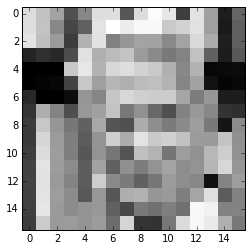

In [12]:
#temp=transform.downscale_local_mean(shannonIm, (4, 4))
qshannonIm=transform.resize(shannonIm, (16, 16))

plt.figure(); io.imshow(qshannonIm)

##Answer

###Simple square filter

<function __main__.AdjustKernelRadius>

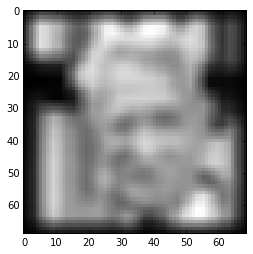

In [13]:
qshannonIm2=transform.resize(qshannonIm, (64, 64), order=0)

def SquareKernel(r):
    w = 2*r + 1
    return np.ones((w,w)) / (w**2)


def AdjustKernelRadius(r):
    fim = signal.convolve2d(qshannonIm2, SquareKernel(r))
    io.imshow(fim)
interact(AdjustKernelRadius, r=(.1,5))


###Circular gaussian filter

Use gaussian_filter from skimage.filter

<function __main__.AdjustKernelRadius>

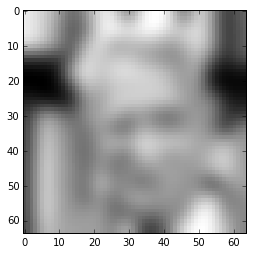

In [14]:
from skimage.filter import gabor_kernel, gaussian_filter

def GaussKernel(r):
    return np.real(gabor_kernel(0.1,sigma_x=r,sigma_y=r))


def AdjustKernelRadius(r):
    io.imshow(gaussian_filter(qshannonIm2, r, output=None, mode='nearest', cval=0, multichannel=None))
interact(AdjustKernelRadius, r=(.1,5))